**A beginners guide to Convolutional Neural Networks (CNN's) - by an enthusiastic beginner!**

The following notebook is a beginners guide to creating a Convolutuonal Neural Network from scratch in PyTorch. It's my first kernel on Kaggle so let me know if and where I made mistakes!
I will be using the MNIST dataset and will try to highlight the areas I found particularly hard to grasp in the hopes that it will help someone else.

Many thanks to Morvan Zhou, whos PyTorch tutorial really helped me understand CNN's (https://github.com/MorvanZhou/PyTorch-Tutorial) and whos work pretty heavily influenced this notebook. Also many thanks to fastai whos free online courses got me interested in data science in the first place (https://www.fast.ai/).

*Update - I didn't realise how good writing something you plan to make public is at getting you motivated to learn!*

Step 1: Import the libraries we'll be using in this notebook.

In [1]:
import torch
import torch.nn as nn                         
# torch.nn contains the classes we will use to actually build the CNN
from torch.autograd import Variable           
# for recording the operations used to create tensors, for computing
# the gradients through backpropagation (deprecated)
import torch.utils.data as Data               
# for creating our dataset and our dataloader 
import torchvision                            
# contains some datasets (such as MNIST we use here) and some common 
# transforms
import matplotlib.pyplot as plt               
# matplotlib for plotting %matplotlib inline means you can plot in the
# notebook
%matplotlib inline

Step 2: Set manual_seed: sets the random seed. This had me confused for awhile. But essentially, as a random number generator is only pseudo-random, setting the manual seed means the same sequence of random numbers are generated each time. I.e. if you create 4 random numbers in a Kaggle kernel and 4 random numbers in your own Jupyter notebook, if the seed is set to the same number, they will be the same.

In [2]:
torch.manual_seed(1)

Step 3: Create the training data. For this we will use torchvision.datasets. We need to specify that it is the train data, which transforms we want and also whether to download it. If you have already downloaded it onto your device, set download=False. If you are running this code in Kaggle, you will need to turn the internet on. Also, I find it helpful to check the size of anything I am working with to help get my head around what's in it.

In [3]:
trainData = torchvision.datasets.MNIST(root='./mnist/',train = True,transform = torchvision.transforms.ToTensor(),download = True)
trainData.data.size()
    

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 25050808.34it/s]                            


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 290680.46it/s]                           
0it [00:00, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 6849277.24it/s]                           
8192it [00:00, 84989.53it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


torch.Size([60000, 28, 28])

So as we can see, we are working with 60,000 images of size 28 x 28 pixels.

Step 4: Having a look at one of the pictures. Using dataset.data[111] gives us the 111th (28, 28) tensor that is in our dataset. We then convert it to a numpy array with numpy and then plot using plt.imshow. We also grab the 111th target to use as the plots title.

(torch.Size([28, 28]), (28, 28))

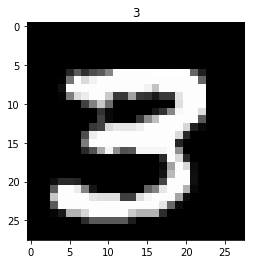

In [4]:
plt.imshow(trainData.data[111].numpy(), cmap='gray')
plt.title('%d' % trainData.targets[111])
trainData.data[111].shape, trainData.data[111].numpy().shape


Step 5: Creating the DataLoader. We use Data.Dataloader and pass in our trainData, set our batch size and set Shuffle to True. Batch size is the number of images out of the 60,000 that will be looked at at once and used to calculate the gradients and update the weights of our parameters. Setting shuffle = True means the batches are shuffled before each epoch.

In [5]:
trainLoader = Data.DataLoader(dataset=trainData, batch_size=30, shuffle=True)

Step 6: Creating the test data. Similar to Step 3, this creates our test dataset.

In [6]:
testData = torchvision.datasets.MNIST(root='./mnist/', train=False, transform = torchvision.transforms.ToTensor())
testData.data.size()

torch.Size([10000, 28, 28])

Step 7: Reshaping the test data tensor to 4d with torch.unsqueeze. Then checking the shape. Always check the shape!

In [7]:
test_x = torch.unsqueeze(testData.data, dim=1).type(torch.FloatTensor)[:]/255 
# need to convert to FloatTensor.
test_x = Variable(test_x)
test_x.data.size()

# Can also use view
# test_x = testData.data.view((10000, -1, 28, 28))
# test_x.data.size()

torch.Size([10000, 1, 28, 28])

Step 8: Creating the test targets and checking the shape.

In [8]:
test_y = testData.targets[:]
test_y.size()

torch.Size([10000])

Step 9: Creating the Neural Network. This step is the most detailed, so I will comment in the code cell instead of here. But essentially we build a CNN class which inherits from nn.Module takes our data above as inputs and outputs our prediction for the image. I will try to add an intuitive explanation once I manage to get it into my own words.

In [9]:
class CNN(nn.Module):   # the class we create will inherit from nn.Module
    def __init__(self):
        super(CNN, self).__init__()                        
        # we always include this line of code. Lets us use the base class functions.
        
        self.conv1 = nn.Sequential(                        
        
        # the input shape will be (1, 28, 28)
        nn.Conv2d(1, 8, 3, 1, 1),                   
        # the output shape will be (8, 28, 28)
            
        # The Conv2d layer above takes 5 numbers in this case. (input_channels=1, 
        # output_channels=8, kernel_size=3, stride=1, padding=1)
        # So the input image is 1 channel x 28 x 28 pixels. Padding=1 means we add 
        # a row/column of zeros to every side to prevent the output
        # from losing a row/column as the kernel is 3x3. If the kernel was 5x5 we 
        # would need to increase padding to 2. 
        # Stride of 1 means we move the kernel over by one pixel at a time. 
        # If we wanted to half the output to 14 x 14 we could set stride to
        # 2. Lastly, 8 output channels means we pass 8 convolutional kernels 
        # over the image to end up with 8 x (1 x 28 x 28) -> (8 x 28 x 28)
           
        # ReLU and BatchNorm: I will try to add a better explanation in the future :-)
            
        nn.ReLU(),
            
        # A ReLU (Rectified Linear Unit) is a non-linear activation function that, in 
        # simple terms, just throws away the negatives. It can
        # be represented as f(x) = max(0, x).
            
        nn.BatchNorm2d(8),
            
        # BatchNorm (from what I understand) normalises the activations of the layer 
        # by transforming them to have 0 mean and unit variance
        # (i.e. 0 mean SD of 1). The issue is that each batch that passes through 
        # the network may not have the same distributions.
        # Normalising the activations is meant to help the network train faster by 
        # giving it more uniform activation distributions.
        # Alternatively to the above, BatchNorm makes models train faster as it smooths 
        # the optimisation landscape (that crazy graph people
        # show you when they talk about gradient descent). Instead of an irregular 
        # graph, with many local minima and bumps, BatchNorm 
        # gives us a smooth graph. So This means when you train, the gradients are 
        # more predictable and stable.
        )
        
        # I have 4 convolutional layers in this CNN. Not really sure how to choose
        # the structure but this one seems to work okay. If anyone has any ideasd
        # on how to decide on a structure let me know.
        
        self.conv2 = nn.Sequential(     # the input shape will bee (8, 28, 28)
        nn.Conv2d(8, 16, 3, 1, 1),      # the output shape will be (16, 28, 28)
        nn.ReLU(),
        nn.BatchNorm2d(16),             # needs to match output channels above
        )
        self.conv3 = nn.Sequential(     # the input shape will be (16, 28, 28)
        nn.Conv2d(16, 32, 3, 1, 1),     # the output shape will be (32, 28, 28)
        nn.ReLU(),
        nn.BatchNorm2d(32),                       
        nn.MaxPool2d(2)                 
        # the max pool output is (32, 14, 14). Max pooling takes the max value of a
        # square of cells and throws the rest away. This effectively means the width and
        # height of the shape is halved in this case as our max pool is 2 x 2.
        )
        self.conv4 = nn.Sequential( # the input shape will be (32, 14, 14)
        nn.Conv2d(32, 32, 3, 1, 1),    # the output shape will be (32, 14, 14)
        nn.ReLU(),
        nn.BatchNorm2d(32),
        )
        self.out = nn.Linear(32 * 14 * 14, 10)          
        # this takes the conv4 output from 6272 features down to 10 for our 10 digits

    # the forward function basically defines how our network works. It takes the CNN above
    # and each mini batch x, and passes it through the series of functions we defined above.
    # It then returns the output function (our predicted digit). If you prefer, you could
    # have your ReLU and BatchNorm here instead of above like x = ReLU(self.conv1(x)).

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        # We have to reshape our conv4 output to fit it into the linear layer.
        output = self.out(x)
        return output, x

![](http://)Step 10: Creating an instance of our CNN class. Here I create an instance of the CNN class we created above called mnist_cnn. This is our model we will be using. You can then print the model to see a summary with print(mnist_cnn).

In [10]:
mnist_cnn = CNN()
print(mnist_cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (out): Linear(in_features=6272, out_features=10, bias=True)
)


Step 11: Defining our loss function. Here I define the loss function that we are trying to minimise in training. For this problem I have used Cross Entropy Loss. This loss function is also called log loss. Our model outputs 10 probabilities, of which we take the max to find our prediction. With log loss, our loss is small if a high probability is given for the actual label, and it increases rapidly as our predicted probabilty of the actual label decreases.

In [11]:
lossF = nn.CrossEntropyLoss()

Step 12: Defining epochs. An epoch is how many times we look at the complete dataset during training. If set to 1, we pull out mini batches in training until we have seen all of the data. If two, we do it again etc.

In [12]:
epoch = 1

Step 13: Here I have defined a function TrainCNN to train my model. The function iterates through the dataset using the dataloader, passes each minibatch through the network, works out the loss and updates the parameters. It then prints out metrics every 500 steps.

In [13]:
def TrainCNN(dataLoader, model, num_epochs, loss_function, lr):
    for i in range(num_epochs):
        # Enumerate took me awhile to get my head around. But it basically returns a counter
        # with each of the mini batches from my dataloader of the size I set as batch size. 
        # I.e. it will return -> 1, (images minibatch 1, labels minibatch 1),
        # -> 2, (images minibatch 2, labels minibatch 2) until we have gone through all of
        # the data in the dataloader.
        for step, (images,labels) in enumerate(dataLoader):
            images_x = Variable(images)
            labels_y = Variable(labels)

            output = model(images_x)[0]
            # output is the 10 predictions from our CNN.
            loss = loss_function(output, labels_y)
            # loss is the loss of our predictions vs actual.
            optimiser = torch.optim.Adam(model.parameters(), lr)
            # Creating the optimiser and feeding in the parameters and learning rate.
            optimiser.zero_grad()
            # This zeroes out the gradients as they would accumulate otherwise.
            loss.backward()
            # This computes the derivatives of the parameters of the model.
            optimiser.step()
            # Updates the parameters of the model by adding the learning rate multiplies
            # by the derivative of each parameter.

            if step % 500 == 0: # Only does this every 500 minibatches.
                test_output, last_layer = model(test_x) 
                # Gets our 10 predictions of each x in the nth minibatch
                pred_y = torch.max(test_output, 1)[1].data.squeeze()
                # Finds the maximum probability and records as prediction for all.
                accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
                # Compares to the actual to work out how many percent are correct.
                print('Epoch: '+ str(i) + '| test accuracy: %.4f' % accuracy)
                # Prints an accuracy to 4 dp.


Step 14: This is the final step and it calls out TrainCNN function 3 times at 3 different learning rates. I usually start at 1e-3 and decrease by a factor of 10, this for loop just does that for me. You can carry on a but more if you want, but it doesn't seem to get better for me once I get to 1e-5.

In [14]:
for i in range(1,4):
    lr = 1e-2/(i*10)
    # Decreases the lr by factor of 10 each iteration.
    TrainCNN(trainLoader, mnist_cnn,1,lossF, lr)
    

Epoch: 0| test accuracy: 0.3443
Epoch: 0| test accuracy: 0.9752
Epoch: 0| test accuracy: 0.9815
Epoch: 0| test accuracy: 0.9817
Epoch: 0| test accuracy: 0.9803
Epoch: 0| test accuracy: 0.9844
Epoch: 0| test accuracy: 0.9881
Epoch: 0| test accuracy: 0.9879
Epoch: 0| test accuracy: 0.9876
Epoch: 0| test accuracy: 0.9890
Epoch: 0| test accuracy: 0.9894
Epoch: 0| test accuracy: 0.9875


Conclusion: Looks pretty good for a simple model. Accuracy of 98-99%. Please comment and let me know where I have messed up. Or if anyone has any suggestions to how to improve the accuracy, please share!